# Лабораторна робота 2 (1 частина)

Романенко Ілля ФІТ 4-7

23 варіант

## Крок 1

імпрортуємо датафрейм та виведем перші 5 значень таблиці

In [236]:
import pandas as pd
import numpy as np

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
dataFrame = tables[2]

dataFrame.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

## Крок 2

визначаємо розміри "сирого" датасету

In [237]:
print('кількість колонок: ', dataFrame.shape[1])
print('кількість рядків: ', dataFrame.shape[0])

кількість колонок:  7
кількість рядків:  210


## Крок 3

дамо стовпчикам нові назви

In [238]:
newColumnsNames = [
    'country',
    'IMF 2024',
    'IMF year',
    'WB 2023',
    'WB year',
    'UN 2022',
    'UN year',
]

dataFrame.columns = newColumnsNames

dataFrame.head()

,country,IMF 2024,IMF year,WB 2023,WB year,UN 2022,UN year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


## Крок 4

видалимо непотрібні стовці даних

In [239]:
dataFrame = dataFrame.drop(['IMF year', 'WB year', 'UN year'], axis=1)

dataFrame.head()


,country,IMF 2024,WB 2023,UN 2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


## Крок 5

видалимо перший рядок даних "світ"

In [240]:
dataFrame = dataFrame[dataFrame['country'] != 'World']
dataFrame = dataFrame.reset_index(drop=True)

dataFrame.head()

,country,IMF 2024,WB 2023,UN 2022
0,United States,28781083,27360935,25744100
1,China,18532633,17794782,17963170
2,Germany,4591100,4456081,4076923
3,Japan,4110452,4212945,4232173
4,India,3937011,3549919,3465541


## Крок 6

перевіримо кількість пропущених данних

In [241]:
dataFrame.isna().sum()

country     0
IMF 2024    0
WB 2023     0
UN 2022     0
dtype: int64

## Крок 7

Переведемо тип данних в float

In [242]:
dataFrame.replace('—', np.nan, inplace=True)

dataFrame['IMF 2024'] = pd.to_numeric(dataFrame['IMF 2024'], errors='coerce')
dataFrame['WB 2023'] = pd.to_numeric(dataFrame['WB 2023'], errors='coerce')
dataFrame['UN 2022'] = pd.to_numeric(dataFrame['UN 2022'], errors='coerce')

print('типи даних після конвертації: ',  dataFrame.dtypes)
dataFrame.head()

типи даних після конвертації:  country      object
IMF 2024    float64
WB 2023     float64
UN 2022     float64
dtype: object


,country,IMF 2024,WB 2023,UN 2022
0,United States,28781083.0,27360935.0,25744100.0
1,China,18532633.0,17794782.0,17963170.0
2,Germany,4591100.0,4456081.0,4076923.0
3,Japan,4110452.0,4212945.0,4232173.0
4,India,3937011.0,3549919.0,3465541.0


## Крок 8

перевіримо знову пропущенні данні

In [243]:
dataFrame.isna().sum()

country      0
IMF 2024    15
WB 2023      8
UN 2022      1
dtype: int64

## Крок 9

Замінимо всі пропущенні значення на середнє медіанне, та перевіримо дані ще раз

In [244]:
dataFrame = dataFrame.replace({'—': np.NaN})

dataFrame = dataFrame.fillna(dataFrame.mean(numeric_only=True), axis = 0)

dataFrame.head()

,country,IMF 2024,WB 2023,UN 2022
0,United States,28781083.0,27360935.0,25744100.0
1,China,18532633.0,17794782.0,17963170.0
2,Germany,4591100.0,4456081.0,4076923.0
3,Japan,4110452.0,4212945.0,4232173.0
4,India,3937011.0,3549919.0,3465541.0


In [245]:
dataFrame.isna().sum()

country     0
IMF 2024    0
WB 2023     0
UN 2022     0
dtype: int64

## Крок 10

перевіримо на дуплікати

In [246]:
dataFrame.duplicated().sum()

0

## Крок 11

виведем описову статистику датасету

In [247]:
dataFrame.describe()

,IMF 2024,WB 2023,UN 2022
count,2.090000e+02,2.090000e+02,2.090000e+02
mean,5.644339e+05,5.178115e+05,4.811087e+05
std,2.435307e+06,2.325859e+06,2.236743e+06
min,6.600000e+01,6.200000e+01,5.900000e+01
25%,1.446700e+04,1.043800e+04,8.772000e+03
50%,5.631000e+04,4.320500e+04,3.171700e+04
75%,4.099890e+05,3.355330e+05,2.371010e+05
max,2.878108e+07,2.736094e+07,2.574410e+07


## Крок 12

визначимо відхилення (ріницю) між показником "IMF 2024" та "WB 2023"

In [248]:
# створюємо новий датасет в якому додамо новий стопчкик різниці,
# аби ми могли відсортувати за ним
dataFrameDev = dataFrame.copy()
dataFrameDev['deviation'] = dataFrameDev['IMF 2024'] - dataFrameDev['WB 2023']

dataFrameDev = dataFrameDev.sort_values(by='deviation', key=abs, ascending=False)

dataFrameDev.head(10)

,country,IMF 2024,WB 2023,UN 2022,deviation
0,United States,2.878108e+07,27360935.0,25744100.0,1.420148e+06
1,China,1.853263e+07,17794782.0,17963170.0,7.378510e+05
195,Turks and Caicos Islands,5.644339e+05,1402.0,1138.0,5.630319e+05
192,Sint Maarten,5.644339e+05,1623.0,1572.0,5.628109e+05
177,Curaçao,5.644339e+05,3074.0,3075.0,5.613599e+05
175,Greenland,5.644339e+05,3236.0,2926.0,5.611979e+05
165,French Polynesia,5.644339e+05,5815.0,5814.0,5.586189e+05
163,Cayman Islands,5.644339e+05,6601.0,6281.0,5.578329e+05
159,Liechtenstein,5.644339e+05,7365.0,7757.0,5.570689e+05
160,Bermuda,5.644339e+05,7828.0,7546.0,5.566059e+05


## Крок 13

визначимо кореляції між поданими записами даних

In [249]:
correlatinMatrix = dataFrame[['IMF 2024', 'WB 2023', 'UN 2022']].corr()

print(correlatinMatrix)

          IMF 2024   WB 2023   UN 2022
IMF 2024  1.000000  0.998216  0.997244
WB 2023   0.998216  1.000000  0.998610
UN 2022   0.997244  0.998610  1.000000


## Крок 14

визначимо середні значення по стопчиках

In [250]:
meanValues = dataFrame[['IMF 2024', 'WB 2023', 'UN 2022']].mean()

print(meanValues)

IMF 2024    564433.932990
WB 2023     517811.472637
UN 2022     481108.673077
dtype: float64


## Крок 15

Визначимо стандартне відхилення показників кожної країни, знайдемо найбільше та найменше

In [251]:
dataFrameStd = dataFrame.copy()
dataFrameStd['std_deviation'] = dataFrameStd[['IMF 2024', 'WB 2023', 'UN 2022']].std(axis=1)

dataFrameStd[['country', 'std_deviation']].head()

,country,std_deviation
0,United States,1.519553e+06
1,China,3.866667e+05
2,Germany,2.665736e+05
3,Japan,6.543512e+04
4,India,2.514106e+05


In [252]:
devMost = dataFrameStd.sort_values(by='std_deviation', ascending=False)
print('країна з найбільшою варіативністю\n', devMost.head(1)[['country', 'std_deviation']])

devLeast = dataFrameStd.sort_values(by='std_deviation', ascending=True)
print('країна з найменшою варіативністю\n', devLeast.head(1)[['country', 'std_deviation']])


країна з найбільшою варіативністю
          country  std_deviation
0  United States   1.519553e+06
країна з найменшою варіативністю
     country  std_deviation
208  Tuvalu       3.511885


## Крок 15

визначимо країну з найменшими та найбільшими показниками по стопцях

In [253]:
max_mvF_2024_country = dataFrame.loc[dataFrame['IMF 2024'].idxmax(), 'country']
max_wb_2023_country = dataFrame.loc[dataFrame['WB 2023'].idxmax(), 'country']
max_oon_2022_country = dataFrame.loc[dataFrame['UN 2022'].idxmax(), 'country']

print("країна з найвищим показником у IMF 2024: ", max_mvF_2024_country)
print("країна з найвищим показником у WB 2023: ", max_wb_2023_country)
print("країна з найвищим показником у UN 2022: ", max_oon_2022_country)

країна з найвищим показником у IMF 2024:  United States
країна з найвищим показником у WB 2023:  United States
країна з найвищим показником у UN 2022:  United States


In [254]:
max_mvF_2024_country = dataFrame.loc[dataFrame['IMF 2024'].idxmin(), 'country']
max_wb_2023_country = dataFrame.loc[dataFrame['WB 2023'].idxmin(), 'country']
max_oon_2022_country = dataFrame.loc[dataFrame['UN 2022'].idxmin(), 'country']

print("країна з найнищим показником у IMF 2024: ", max_mvF_2024_country)
print("країна з найнищим показником у WB 2023: ", max_wb_2023_country)
print("країна з найнищим показником у UN 2022: ", max_oon_2022_country)

країна з найнищим показником у IMF 2024:  Tuvalu
країна з найнищим показником у WB 2023:  Tuvalu
країна з найнищим показником у UN 2022:  Tuvalu


## Крок 16

побудуємо гістограму розподілу країн за показником IMF 2024

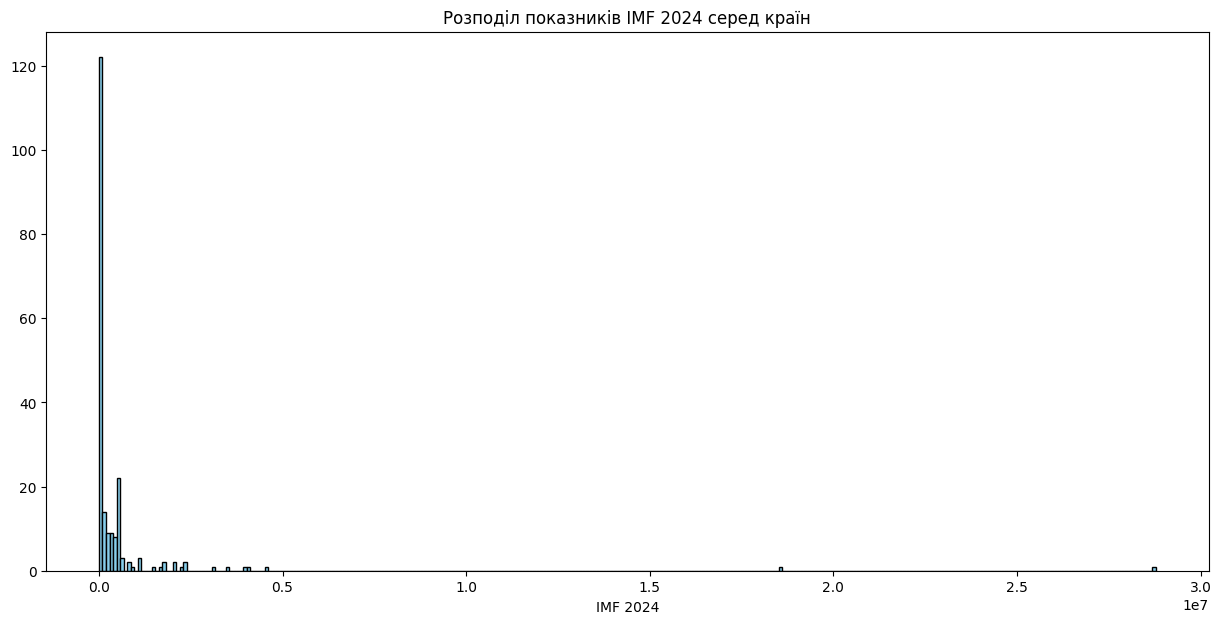

,country,IMF 2024,WB 2023,UN 2022
0,United States,28781083.0,27360935.0,25744100.0
1,China,18532633.0,17794782.0,17963170.0
2,Germany,4591100.0,4456081.0,4076923.0
3,Japan,4110452.0,4212945.0,4232173.0
4,India,3937011.0,3549919.0,3465541.0
5,United Kingdom,3495261.0,3340032.0,3089072.0
6,France,3130014.0,3030904.0,2775316.0
7,Brazil,2331391.0,2173666.0,1920095.0
8,Italy,2328028.0,2254851.0,2046952.0
9,Canada,2242182.0,2140086.0,2137939.0


In [255]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.hist(dataFrame['IMF 2024'], bins=300, color='skyblue', edgecolor='black')

plt.title('Розподіл показників IMF 2024 серед країн')
plt.xlabel('IMF 2024')

plt.show()

dataFrame.head(10)



## Крок 17

розрахуємо частку кожної країни в загальному значенні для кожного з показників

In [256]:
dataFrameShare = dataFrame.copy()

total_imf_2024 = dataFrameShare['IMF 2024'].sum()
total_wb_2023 = dataFrameShare['WB 2023'].sum()
total_un_2022 = dataFrameShare['UN 2022'].sum()

dataFrameShare['IMF 2024 share'] = dataFrameShare['IMF 2024'] / total_imf_2024
dataFrameShare['WB 2023 share'] = dataFrameShare['WB 2023'] / total_wb_2023
dataFrameShare['UN 2022 share'] = dataFrameShare['UN 2022'] / total_un_2022

print(dataFrameShare[['country', 'IMF 2024 share', 'WB 2023 share', 'UN 2022 share']])


              country  IMF 2024 share  WB 2023 share  UN 2022 share
0       United States    2.439764e-01   2.528209e-01   2.560285e-01
1               China    1.571006e-01   1.644276e-01   1.786461e-01
2             Germany    3.891861e-02   4.117514e-02   4.054554e-02
3               Japan    3.484417e-02   3.892851e-02   4.208952e-02
4               India    3.337392e-02   3.280201e-02   3.446526e-02
..                ...             ...            ...            ...
204          Kiribati    2.636337e-06   2.578020e-06   2.217764e-06
205             Palau    2.610906e-06   2.430176e-06   2.237655e-06
206  Marshall Islands    2.585476e-06   2.624221e-06   2.774692e-06
207             Nauru    1.364792e-06   1.422993e-06   1.461934e-06
208            Tuvalu    5.594800e-07   5.728933e-07   5.867628e-07

[209 rows x 4 columns]
